c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.9069 - loss: 0.2949 - val_accuracy: 0.9850 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9858 - loss: 0.0449 - val_accuracy: 0.9887 - val_loss: 0.0353
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9905 - val_loss: 0.0303
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9938 - loss: 0.0202 - val_accuracy: 0.9878 - val_loss: 0.0411
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9947 - loss: 0.0147 - val_accuracy: 0.9877 - val_loss: 0.0415
313/313 - 3s - 9ms/step - accuracy: 0.9877 - loss: 0.0415
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
MAE: 0.0467, MSE: 0.2293, RMSE: 0.47885279575251516
Test Loss: 0.04151180386543274, Test Accuracy: 0.9876999855041504


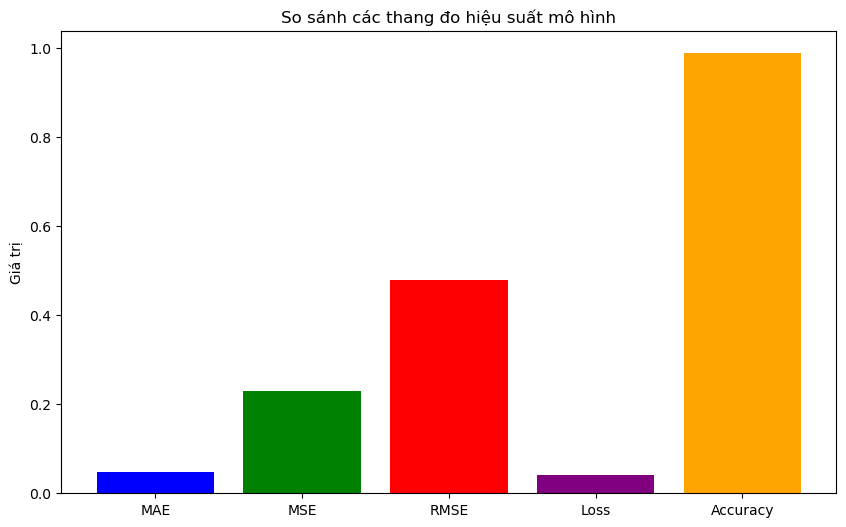

In [ ]:
# 1. Mô hình CNN với tệp dữ liệu MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu
x_train, x_test = x_train / 255.0, x_test / 255.0

# Thêm một chiều để phù hợp với mô hình CNN
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Bước 2: Xây dựng mô hình CNN với ít nhất 5 lớp
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = np.argmax(model.predict(x_test), axis=1)

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình')
plt.ylabel('Giá trị')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9133 - loss: 0.2896 - val_accuracy: 0.9818 - val_loss: 0.0552
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9859 - loss: 0.0447 - val_accuracy: 0.9875 - val_loss: 0.0398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9912 - loss: 0.0281 - val_accuracy: 0.9881 - val_loss: 0.0354
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9904 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9956 - loss: 0.0141 - val_accuracy: 0.9900 - val_loss: 0.0314
313/313 - 3s - 9ms/step - accuracy: 0.9900 - loss: 0.0314
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
MAE: 0.0384, MSE: 0.1956, RMSE: 0.4422668877499196
Test Loss: 0.03144949674606323, Test Accuracy: 0.9900000095367432


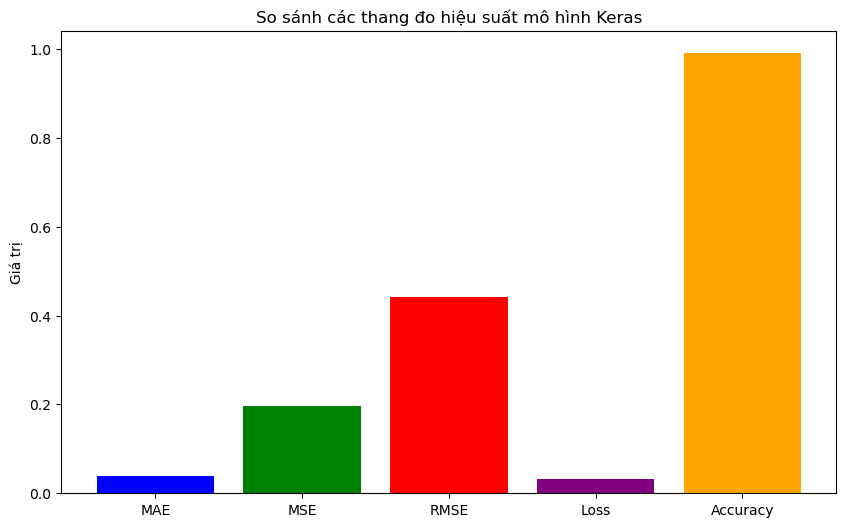

In [ ]:
# 2. Mô hình Keras với tệp dữ liệu MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu
x_train, x_test = x_train / 255.0, x_test / 255.0

# Thêm một chiều để phù hợp với mô hình Keras
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Bước 2: Xây dựng mô hình Keras với ít nhất 5 lớp
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = np.argmax(model.predict(x_test), axis=1)

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình Keras')
plt.ylabel('Giá trị')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 0.7804 - loss: 0.6449 - val_accuracy: 0.9457 - val_loss: 0.1791
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9525 - loss: 0.1671 - val_accuracy: 0.9604 - val_loss: 0.1404
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9620 - loss: 0.1310 - val_accuracy: 0.9721 - val_loss: 0.1002
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9697 - loss: 0.1061 - val_accuracy: 0.9737 - val_loss: 0.0920
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9723 - loss: 0.0995 - val_accuracy: 0.9757 - val_loss: 0.0918
313/313 - 3s - 8ms/step - accuracy: 0.9757 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
MAE: 0.0908, MSE: 0.4356, RMSE: 0.66
Test Loss: 0.09182300418615341, Test Accuracy: 0.9757000207901001


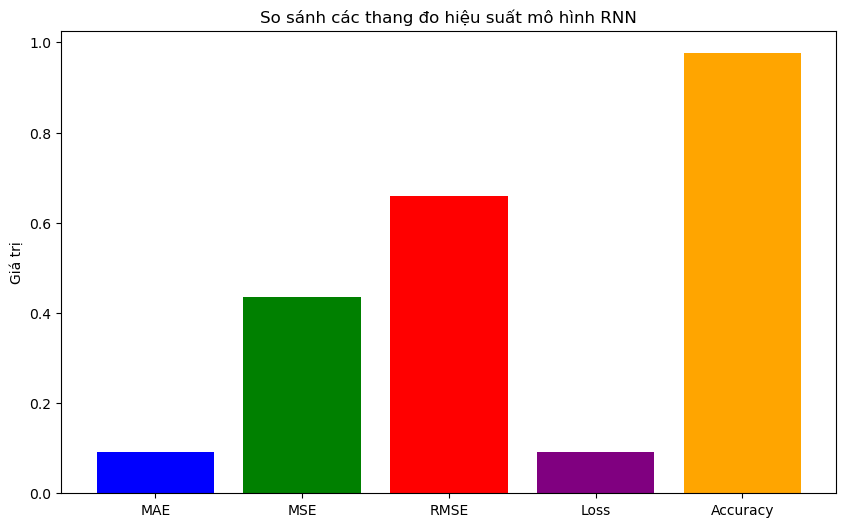

In [ ]:
# 3. Mô hình RNN với tệp dữ liệu MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu
x_train, x_test = x_train / 255.0, x_test / 255.0

# Thêm một chiều để phù hợp với mô hình RNN
# Chúng ta sẽ thay đổi hình dạng dữ liệu để phù hợp với RNN
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28))

# Bước 2: Xây dựng mô hình RNN với ít nhất 5 lớp
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(28, 28), activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = np.argmax(model.predict(x_test), axis=1)

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình RNN')
plt.ylabel('Giá trị')
plt.show()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 150s 181ms/step - accuracy: 0.6930 - loss: 0.5247 - val_accuracy: 0.8719 - val_loss: 0.3018
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.9298 - loss: 0.1889 - val_accuracy: 0.8587 - val_loss: 0.3343
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 165ms/step - accuracy: 0.9720 - loss: 0.0877 - val_accuracy: 0.8754 - val_loss: 0.3564
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 0.9912 - loss: 0.0303 - val_accuracy: 0.8742 - val_loss: 0.4753
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 168ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.8632 - val_loss: 0.6145
782/782 - 24s - 31ms/step - accuracy: 0.8632 - loss: 0.6145
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step
MAE: 0.13684, MSE: 0.13684, RMSE: 0.36991891003299626
Test Loss: 0.6144811511039734, Test Accuracy: 0.8631600141525269


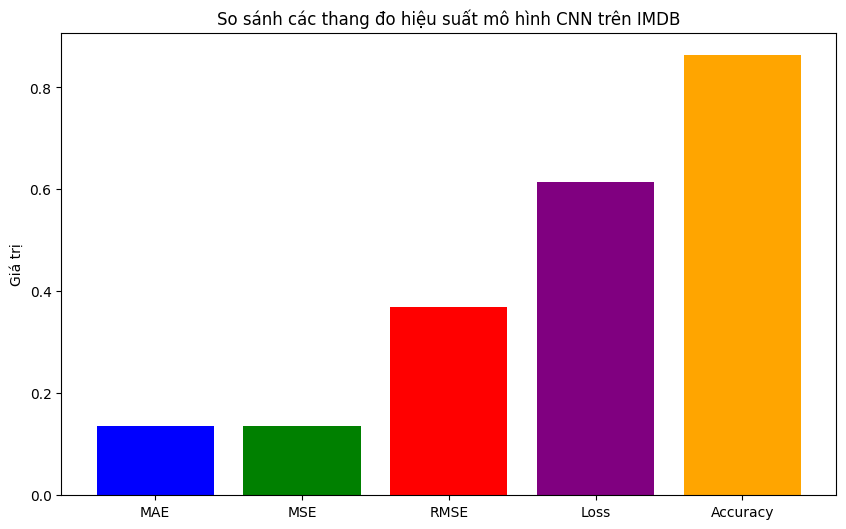

In [1]:
# 4. Mô hình CNN với tệp dữ liệu IMDB
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu IMDB
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Giới hạn độ dài của các câu và đệm thêm nếu cần
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Bước 2: Xây dựng mô hình CNN
model = models.Sequential([
    layers.Embedding(10000, 128, input_length=max_len),  # Lớp embedding
    layers.Conv1D(32, 7, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, 7, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 đầu ra cho phân loại nhị phân
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Phân loại nhị phân
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Vì là bài toán phân loại nhị phân

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình CNN trên IMDB')
plt.ylabel('Giá trị')
plt.show()


In [ ]:
# 5. Mô hình Keras với tệp dữ liệu IMDB
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu IMDB
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Giới hạn độ dài của các câu và đệm thêm nếu cần
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Bước 2: Xây dựng mô hình Keras
model = models.Sequential([
    layers.Embedding(10000, 128, input_length=max_len),  # Lớp embedding
    layers.LSTM(128, return_sequences=True),  # LSTM layer
    layers.LSTM(64),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Phân loại nhị phân
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Phân loại nhị phân
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Phân loại nhị phân

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình Keras trên IMDB')
plt.ylabel('Giá trị')
plt.show()


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


  9/782 ━━━━━━━━━━━━━━━━━━━━ 16:14 1s/step - accuracy: 0.4968 - loss: 0.6929

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 406s 514ms/step - accuracy: 0.5087 - loss: 0.6985 - val_accuracy: 0.7038 - val_loss: 0.5684
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 443s 515ms/step - accuracy: 0.7715 - loss: 0.4954 - val_accuracy: 0.7185 - val_loss: 0.5742
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 440s 512ms/step - accuracy: 0.8048 - loss: 0.4363 - val_accuracy: 0.7703 - val_loss: 0.5086
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 485s 567ms/step - accuracy: 0.8114 - loss: 0.4249 - val_accuracy: 0.8277 - val_loss: 0.4020
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 448s 499ms/step - accuracy: 0.6810 - loss: 0.5775 - val_accuracy: 0.6698 - val_loss: 0.6127
782/782 - 70s - 89ms/step - accuracy: 0.6698 - loss: 0.6127
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step
MAE: 0.33024, MSE: 0.33024, RMSE: 0.574665119874175
Test Loss: 0.6126611232757568, Test Accuracy: 0.66975998878479


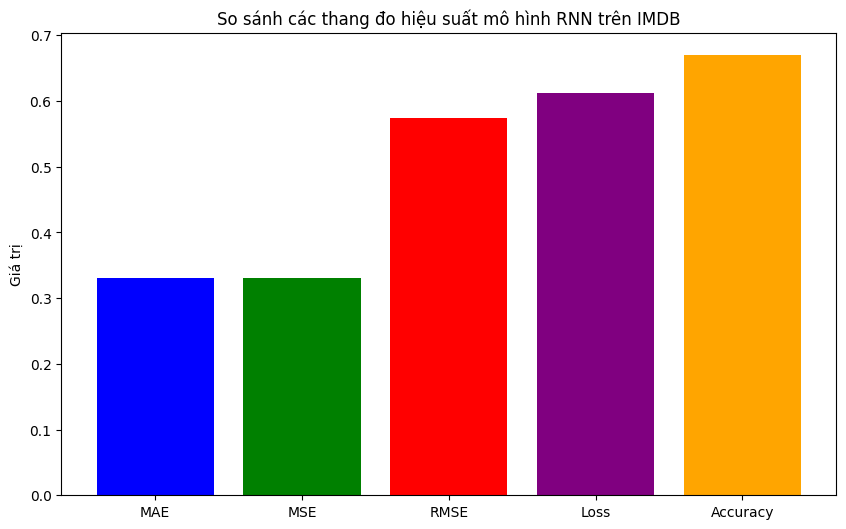

In [3]:
# 6. Mô hình RNN với tệp dữ liệu IMDB
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu IMDB
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Giới hạn độ dài của các câu và đệm thêm nếu cần
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Bước 2: Xây dựng mô hình RNN với ít nhất 5 lớp
model = models.Sequential([
    layers.Embedding(10000, 128, input_length=max_len),  # Lớp embedding
    layers.SimpleRNN(128, return_sequences=True),  # Lớp RNN
    layers.SimpleRNN(64),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Phân loại nhị phân
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Phân loại nhị phân
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Phân loại nhị phân

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình RNN trên IMDB')
plt.ylabel('Giá trị')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 580.8623 - mae: 22.1551 - val_loss: 500.7323 - val_mae: 20.4727
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 419.4065 - mae: 17.8744 - val_loss: 118.5396 - val_mae: 8.8781
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 123.6909 - mae: 8.9228 - val_loss: 91.2300 - val_mae: 7.5363
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 91.9224 - mae: 7.3711 - val_loss: 76.8394 - val_mae: 6.9315
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 76.6304 - mae: 6.7199 - val_loss: 71.3554 - val_mae: 6.6785
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 70.4585 - mae: 6.2631 - val_loss: 68.0694 - val_mae: 6.5400
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 70.5259 - mae: 6.1399 - val_loss: 65.0863 - val_mae: 6.4036
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 75.3240 - mae: 6.4060 - val_loss: 62.0186 - val_mae: 6.2758
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

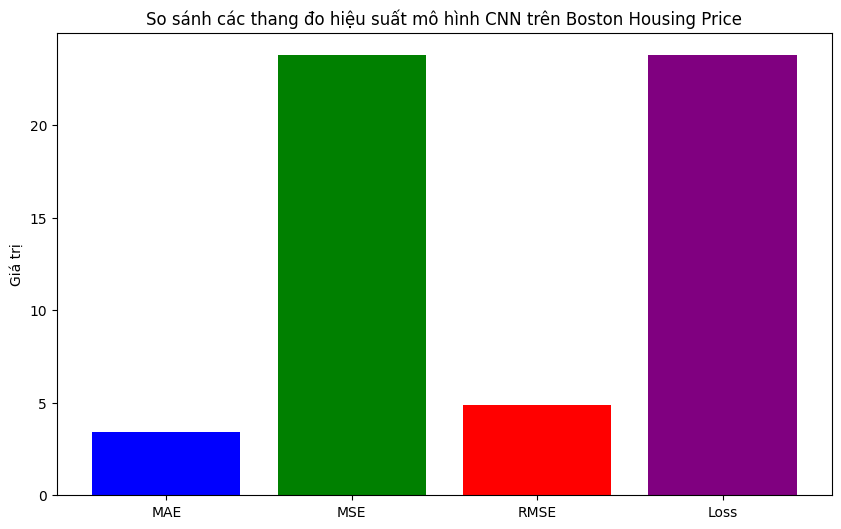

In [7]:
# 7. Mô hình CNN với tệp dữ liệu Boston Housing Price prediction
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu Boston Housing Price
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Chuẩn hóa dữ liệu
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Reshape lại dữ liệu để phù hợp với mô hình CNN
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Bước 2: Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Đầu ra là giá trị dự đoán (hồi quy)
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Sử dụng MSE cho bài toán hồi quy
              metrics=['mae'])  # MAE cũng là metric phổ biến cho hồi quy

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán giá nhà trên tập test
y_pred = model.predict(x_test)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {test_mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss']
values = [test_mae, mse, rmse, test_loss]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('So sánh các thang đo hiệu suất mô hình CNN trên Boston Housing Price')
plt.ylabel('Giá trị')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 562.1479 - mae: 22.0087 - val_loss: 562.8191 - val_mae: 21.9355
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 490.7232 - mae: 20.4115 - val_loss: 498.3871 - val_mae: 20.3834
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 440.0789 - mae: 19.0612 - val_loss: 410.8055 - val_mae: 18.1173
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 418.0280 - mae: 17.7229 - val_loss: 299.1556 - val_mae: 15.1986
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 256.4554 - mae: 13.7775 - val_loss: 184.4150 - val_mae: 11.6994
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167.8321 - mae: 10.4934 - val_loss: 101.9552 - val_mae: 8.4737
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.1447 - mae: 7.0684 - val_loss: 69.2578 - val_mae: 6.4486
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.9674 - mae: 6.0125 - val_loss: 55.0838 - val_mae: 5.6063
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MAE: 3.063164710998535, MSE: 20.682308656010072, RMSE: 4.547780629714902
Test Loss: 20.682308197021484


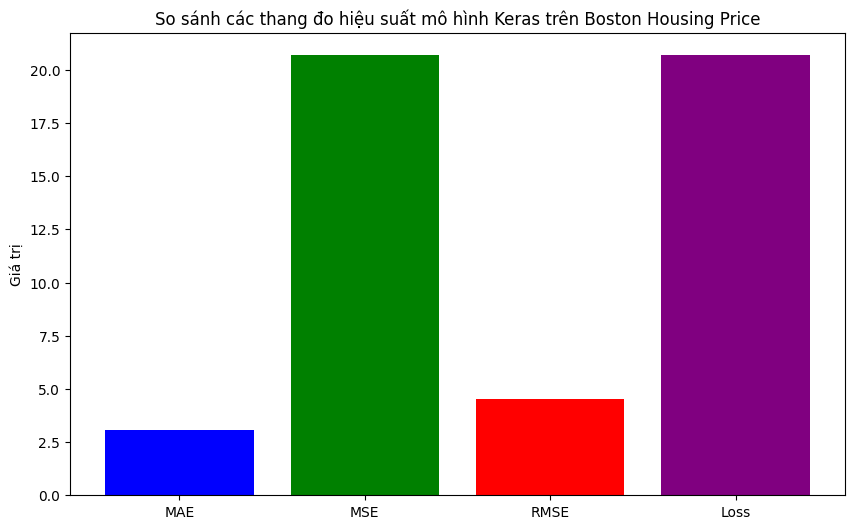

In [6]:
# 8. Mô hình Keras với tệp dữ liệu Boston Housing Price prediction
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu Boston Housing Price
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Chuẩn hóa dữ liệu
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Bước 2: Xây dựng mô hình Keras
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Đầu ra là giá trị dự đoán (hồi quy)
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE cho bài toán hồi quy
              metrics=['mae'])  # Sử dụng MAE làm metric chính

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán giá nhà trên tập test
y_pred = model.predict(x_test)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {test_mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss']
values = [test_mae, mse, rmse, test_loss]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('So sánh các thang đo hiệu suất mô hình Keras trên Boston Housing Price')
plt.ylabel('Giá trị')
plt.show()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 583.8416 - mae: 22.2849 - val_loss: 567.2310 - val_mae: 21.9392
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 509.4904 - mae: 20.4558 - val_loss: 471.4352 - val_mae: 19.5791
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 381.2401 - mae: 17.2011 - val_loss: 288.9244 - val_mae: 15.0023
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 226.6092 - mae: 12.6870 - val_loss: 87.4665 - val_mae: 8.1252
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 81.0563 - mae: 7.1266 - val_loss: 56.3379 - val_mae: 6.1268
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 54.8661 - mae: 5.5734 - val_loss: 36.7385 - val_mae: 4.7522
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 34.1107 - mae: 4.3134 - val_loss: 31.5985 - val_mae: 4.4072
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32.1526 - mae: 3.8882 - val_loss: 30.6086 - val_mae: 4.3516
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

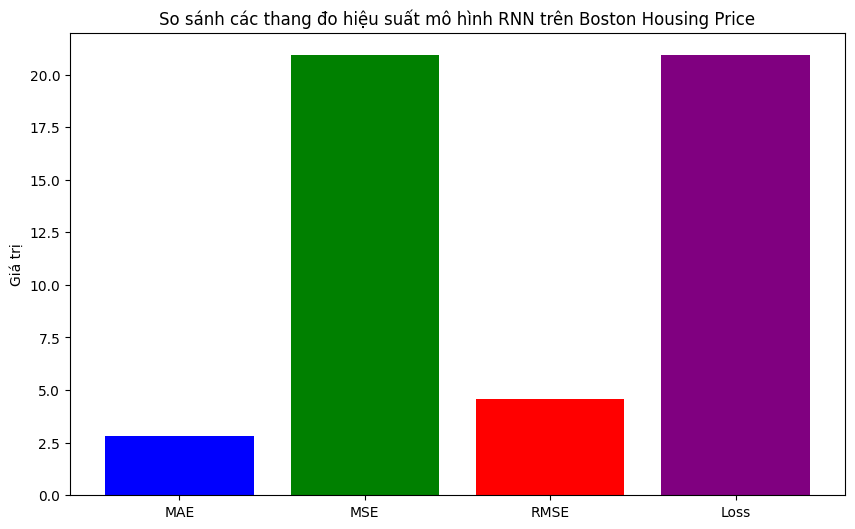

In [5]:
# 9. Mô hình RNN với tệp dữ liệu Boston Housing Price prediction
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu Boston Housing Price
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Chuẩn hóa dữ liệu
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Reshape lại dữ liệu để phù hợp với mô hình RNN
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Bước 2: Xây dựng mô hình RNN
model = models.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(1, x_train.shape[2]), return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Đầu ra là giá trị dự đoán (hồi quy)
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE cho bài toán hồi quy
              metrics=['mae'])  # Sử dụng MAE làm metric chính

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán giá nhà trên tập test
y_pred = model.predict(x_test)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {test_mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss']
values = [test_mae, mse, rmse, test_loss]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('So sánh các thang đo hiệu suất mô hình RNN trên Boston Housing Price')
plt.ylabel('Giá trị')
plt.show()
